In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [8]:
data = pd.read_csv("dataset_4.csv", index_col = 0)
data

,text,label
0,Horse face hoe stop playing before I show the...,1
1,Alex Brosas another idiot,1
2,as Nancy Reagan would say just say FUCKING ...,1
3,Not being homophobic here but uhhhhhhhhhh...,1
4,The Nazi death gas so horrific even Hitler fe...,0
...,...,...
99794,Throat Slammed Slut Gets Her Ass Fucked https:...,1
99795,RT @TheCristianoGuy: This is everything. Isco ...,1
99796,RT @spoiledbabbby: ion wish a heartbreak on an...,0
99797,MY DAD JUST APRIL FOOLED ME BY SAYING BTS WAS ...,1


In [9]:
def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [10]:
def feature_extract(train_text, stop_word=True, n_gram=(1, 1)):
    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(train_text)

        train_feature_set = tf_idf.transform(train_text)
        
    return train_feature_set

In [11]:
X = data['text'].values.astype('U')
temp_y = data["label"].values.astype('U')
X = feature_extract(X)
y = []
for label in temp_y:
    if label == "1":
        y.append(1)
    else:
        y.append(0)

In [12]:
clf = svm.SVC(gamma="scale")
cv_score_list = []
for c in tqdm(range(3, 20)):
    scores = cross_val_score(clf, X, y, cv=c)
    cv_score_list.append(scores.mean())


100%|██████████| 17/17 [4:50:26<00:00, 1025.10s/it]


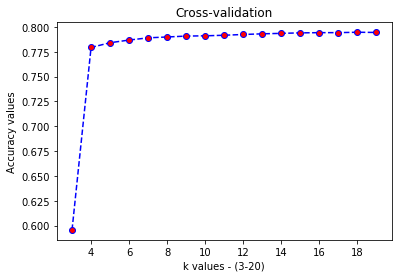

In [13]:
for i in range(len(cv_score_list)):
    cv_score_list[i] = cv_score_list[i].mean()
draw_plot(range(3, 20), cv_score_list, "Cross-validation", "k values - (3-20)", "Accuracy values" )

In [ ]:
c_acc_list = []
for c in range(1, 21):
    clf = svm.SVC(C=c, kernel="rbf", gamma="scale", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

In [ ]:
draw_plot(range(1, 21), c_acc_list, "Different C Values in SVM Model", "c values", "Accuracies")

In [ ]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)
c += 1
print(c)

In [ ]:
kernel_acc_list = []
for ker in ["linear", "poly", "rbf", "sigmoid"]:
    clf = svm.SVC(kernel=ker, gamma="scale", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    kernel_acc_list.append(scores.mean())
    print("Accuracy", ker, ": ", scores.mean())

In [ ]:
for c in range(1, 100, 5):
    #for gam in ["auto", "scale"]:
    X_train, X_test = feature_extract(train_text, test_text)
    clf = svm.SVC(C=c, kernel="linear", gamma="scale", random_state=42) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy C =", c, "linear: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
X = data['text'].values.astype('U')
temp_y = data["label"].values.astype('U')
X = feature_extract(X, stop_word=False)
y = []
for label in temp_y:
    if label == "1":
        y.append(1)
    else:
        y.append(0)